!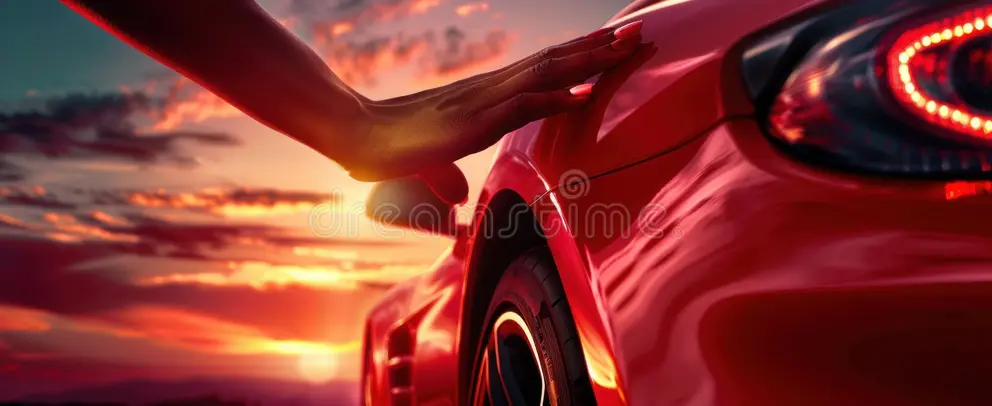

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# 1.EDA ANALYSIS

Initial Data Understanding
* Data Loading and Inspection
* Data Types
* Missing Values
* Duplicates

In [ ]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv", delimiter=",")

df.head()

In [ ]:
df.info()

In [ ]:
df.shape



In [ ]:

# Check Missing Values
df.isna().sum()

In [ ]:
# Check Duplicates
df.duplicated().sum()

In [ ]:
# Precentage of Duplicates
df.duplicated().sum() * 100 / len(df)

In [ ]:
df.drop_duplicates(inplace=True)

# 2. Basic Statistical Overview¶ Summary Statistics (describe(), value_counts()) Zero and Constant Values

* Summary statistic
* Zero and Constant Values


In [ ]:
# Summary [Descriptive] Statistics for Numerical Columns
df.describe(include="number")

In [ ]:
# Summary [Descriptive] Statistics for Categorical Columns
df.describe(include="object")

In [ ]:
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(exclude="number").columns)

print(numerical_cols)
print(categorical_cols)

In [ ]:
def display_values(col):
    print("Value Counts for Column", col)
    print(df[col].value_counts())
    print("="*50)
    print("Unique Values and Length of it:")
    print(df[col].unique())
    print(df[col].nunique())

In [ ]:
for col in categorical_cols:
    display_values(col)
    print("*"*50)

In [ ]:
# Replace Value (-) in Levy Column with 0
df["Levy"] = df["Levy"].replace("-", 0)

# Convert it into Numeric Type
df["Levy"] = pd.to_numeric(df["Levy"])
df["Mileage"] = df["Mileage"].str.split(" ").str[0]

df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Doors"]  # Ambiguous Values -> Drop it

df.drop("Doors", axis=1, inplace=True)
df["Engine volume"] = df["Engine volume"].str.split().str[0]

df["Engine volume"] = pd.to_numeric(df["Engine volume"])

# 3. Distribution of Variables

* Numerical Features (Histograms, KDE)
* Categorical Features (Bar Plot, Check Imbalance)
* Outlier Detection

In [ ]:
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(exclude="number").columns)

In [ ]:
for col in numerical_cols:
    sns.kdeplot(df[col])
    plt.show()

# 4. Correlation¶

* Numerical Correlations
* Categotical Correlations

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 5. Feature Interactions

* Scatter Plot
* Box Plot

In [ ]:
sns.pairplot(df[:100])

In [ ]:
for col in numerical_cols:
    print(f"{col}")
    sns.boxplot(df[col])
    plt.show()

In [ ]:
df[df["Price"] > 5e5]

In [ ]:
def clean_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # df[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Remove Outliers
    # Replace Outliers with Upper Bound if Above Or with Lower Bound If Below
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # df[col] = np.wher(df[col] < lower_bound, lower_bound, df[col])
    # df[col] = np.wher(df[col] > upper_bound, upper_bound, df[col])
    return df

In [ ]:
for col in ["Price", "Mileage", "Levy"]:
    df = clean_outliers(df, col)

In [ ]:
for col in numerical_cols:
    print(f"{col}")
    sns.boxplot(df[col])
    plt.show()

# 6. Target Variable Analysis

* Distribution of Target Variable(for class imbalance, decide if resampling or weighting is needed) -->> In Case of Classification
* Relationship between Predictors (Scatter Plot, Box Plot versus the Target)

In [ ]:
for col in categorical_cols:
    # Select Top 10 Categories of each Column
    top_categories = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=filtered_df[col], y=filtered_df["Price"])
    plt.title(f"Box Plot of {col} vs. Price")

In [ ]:
df["Engine volume"].unique()

In [ ]:
df["Airbags"].value_counts()

In [ ]:
df["Cylinders"].value_counts()

In [ ]:
for col in ["Cylinders", "Airbags", "Engine volume"]:
    top_values = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=filtered_df[col], y=filtered_df["Price"])
    plt.title(f"Box Plot of {col} vs. Price")

# thank you

*You can do future engineering :)*